In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#load dataset
data=pd.read_csv('Image_labels_path.csv')
data.head()

,combine_fracture,non_fracture
0,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
1,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
2,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
3,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
4,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...,C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...


In [3]:
data['combine_fracture']

0       C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
1       C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
2       C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
3       C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
4       C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
                              ...                        
4775    C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
4776    C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
4777    C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
4778    C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
4779    C:\Users\rnkha\OneDrive\Desktop\Gajedi\bone_fr...
Name: combine_fracture, Length: 4780, dtype: object

In [4]:
#Def image processing

def image_processing(img_path):
    img=cv2.imread(img_path)
    plt.imshow(img)
    
    #convert to rgb
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    #resize to 100*100
    img_resize=cv2.resize(img_rgb, (100,100))
    plt.imshow(img_resize)
    #convert to numpy array
    img_arr=np.array(img_resize).flatten()
    #convert to dataframe
    img_df=pd.DataFrame(img_arr).T
    return img_df
   


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


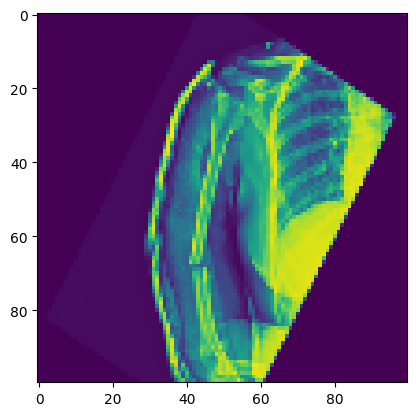

In [5]:
image_processing(data['combine_fracture'][0])

In [6]:
final_df=pd.DataFrame()
final_df

""


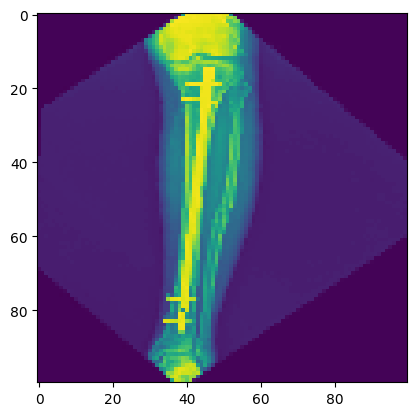

In [13]:
for img in data['combine_fracture']:
    df_x=image_processing(img)
    final_df=pd.concat([final_df,df_x])
final_df['label']='Fractured'
            

In [16]:
final_dfx=pd.DataFrame()

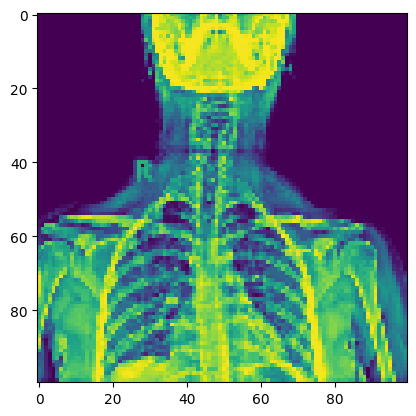

In [17]:
for img in data['non_fracture']:
    df_x=image_processing(img)
    final_dfx=pd.concat([final_dfx,df_x])
final_dfx['label']='Non-Fractured'

In [18]:
final_df.index=range(len(final_df))


In [19]:
final_dfx.index=range(len(final_dfx))

In [20]:
# final_df.to_csv('bone_fractured_unlabelled.csv',index='False')

In [21]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
1,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
2,0,0,0,0,0,0,7,9,16,23,...,0,0,0,0,0,0,0,0,0,Fractured
3,0,0,0,0,0,0,0,0,0,0,...,175,175,166,152,143,140,145,153,172,Fractured
4,0,0,0,0,0,0,0,0,4,6,...,0,0,0,0,0,0,0,107,204,Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Fractured
4776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
4777,0,0,1,39,53,132,142,156,173,184,...,32,33,31,33,32,35,32,33,31,Fractured
4778,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Fractured


In [22]:
final_dfx

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,80,77,83,84,90,86,86,84,82,71,...,7,7,7,7,7,7,7,7,7,Non-Fractured
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Non-Fractured
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
3,27,28,23,30,27,26,27,26,28,27,...,29,31,28,33,33,29,33,31,35,Non-Fractured
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,6,6,6,6,6,6,6,6,6,6,...,18,18,18,18,18,18,18,18,18,Non-Fractured
4776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
4777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
4778,16,16,16,16,16,16,28,103,116,119,...,36,25,16,16,16,16,16,16,16,Non-Fractured


In [23]:
final_df.shape

(4780, 10001)

In [24]:
final_dfx.shape

(4780, 10001)

In [25]:
# concating final_df and final_dfx
final_images_df=pd.concat([final_df,final_dfx])

In [26]:
final_images_df.to_csv('final_images_df.csv', index=False)


In [27]:
data1=pd.read_csv('final_images_df.csv')

In [28]:
data1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
1,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
2,0,0,0,0,0,0,7,9,16,23,...,0,0,0,0,0,0,0,0,0,Fractured
3,0,0,0,0,0,0,0,0,0,0,...,175,175,166,152,143,140,145,153,172,Fractured
4,0,0,0,0,0,0,0,0,4,6,...,0,0,0,0,0,0,0,107,204,Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,6,6,6,6,6,6,6,6,6,6,...,18,18,18,18,18,18,18,18,18,Non-Fractured
9556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
9557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
9558,16,16,16,16,16,16,28,103,116,119,...,36,25,16,16,16,16,16,16,16,Non-Fractured
